# Kelompok 6: E-commerce Shipping
- Ketua: Refanie FS
- Anggota:
1. Nur Cahyanti
2. Handika
3. Indra Laksana
4. Fajar Nurdiono
5. Utlia Rahma

# [0] Initiation

In [ ]:
# Run to access the CSV file
!git clone https://github.com/refaniefs/rakamin.git

Cloning into 'rakamin'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [ ]:
# Run to install and import packages
!pip install --upgrade xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 96 kB 3.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# data path
df = pd.read_csv('rakamin/final-project/shipping.csv')
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
8584,8585,C,Ship,3,2,154,10,high,F,8,5811,1
55,56,F,Ship,2,5,246,5,low,M,46,2437,1
2008,2009,C,Ship,3,2,134,3,medium,F,54,1932,1
1791,1792,B,Flight,4,4,137,2,medium,M,37,1447,1
6485,6486,F,Ship,3,4,260,4,medium,M,10,5425,0


In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# [1] Data Cleansing

## (A) Handling Missing Values

In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Tidak ada kolom yang memiliki missing values.

## (B) Handling Duplicated Data

In [ ]:
df.duplicated().any()

False

Tidak ada kolom yang memiliki data duplikat.

## (C) Feature Transformation

### Sebelum Ditransformasi

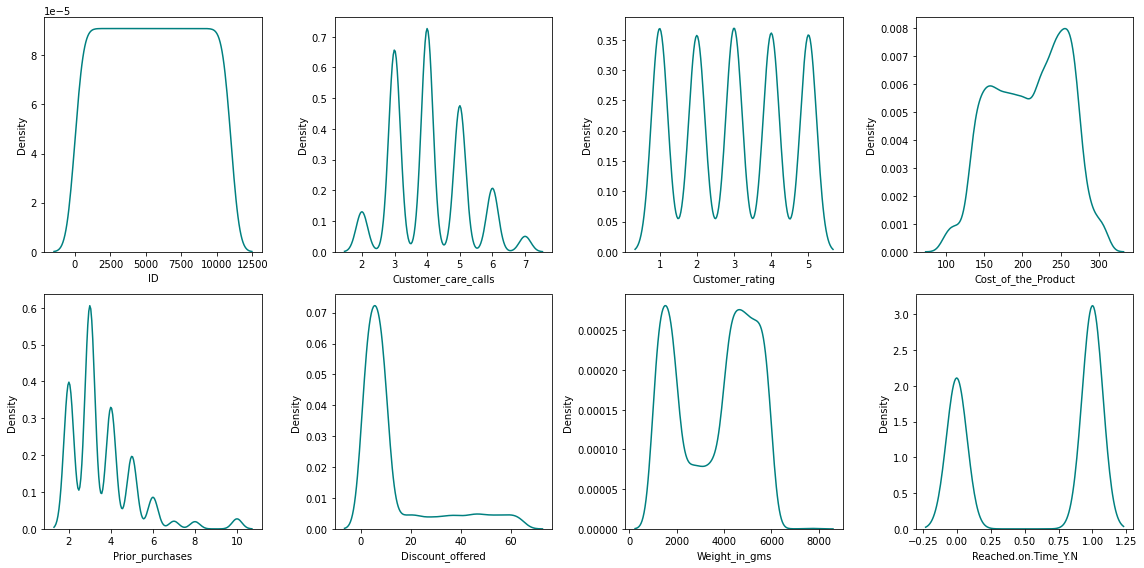

In [ ]:
# Kdeplot sebelum transformasi
features = nums
plt.figure(figsize=(16, 8))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='teal')
    plt.xlabel(features[i])
    plt.tight_layout()

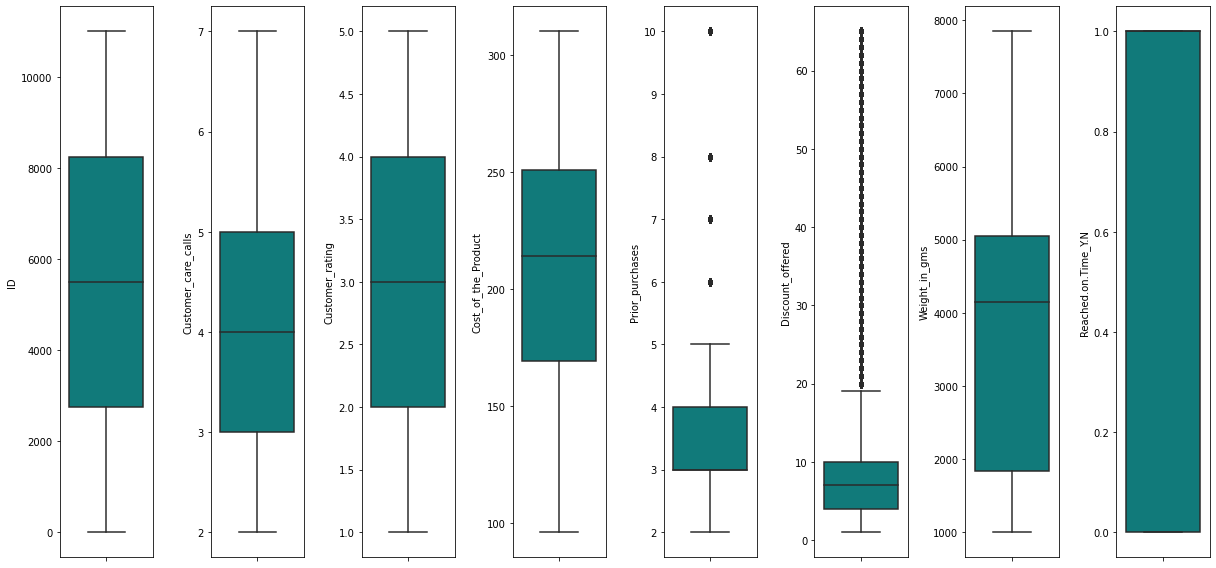

In [ ]:
# Boxplot sebelum transformasi
features = nums
plt.figure(figsize=(17, 8))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='darkcyan', orient='v')
    plt.tight_layout()

### Quantile Transformation (opsi 1)

In [ ]:
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')

In [ ]:
df['Cost_of_the_Product_tr'] = quantile.fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['Discount_offered_tr'] = quantile.fit_transform(df['Discount_offered'].values.reshape(len(df), 1))
df['Customer_care_calls_tr'] = quantile.fit_transform(df['Customer_care_calls'].values.reshape(len(df), 1))
df['Weight_in_gms_tr'] = quantile.fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))
df['Prior_purchases_tr'] = quantile.fit_transform(df['Prior_purchases'].values.reshape(len(df), 1))

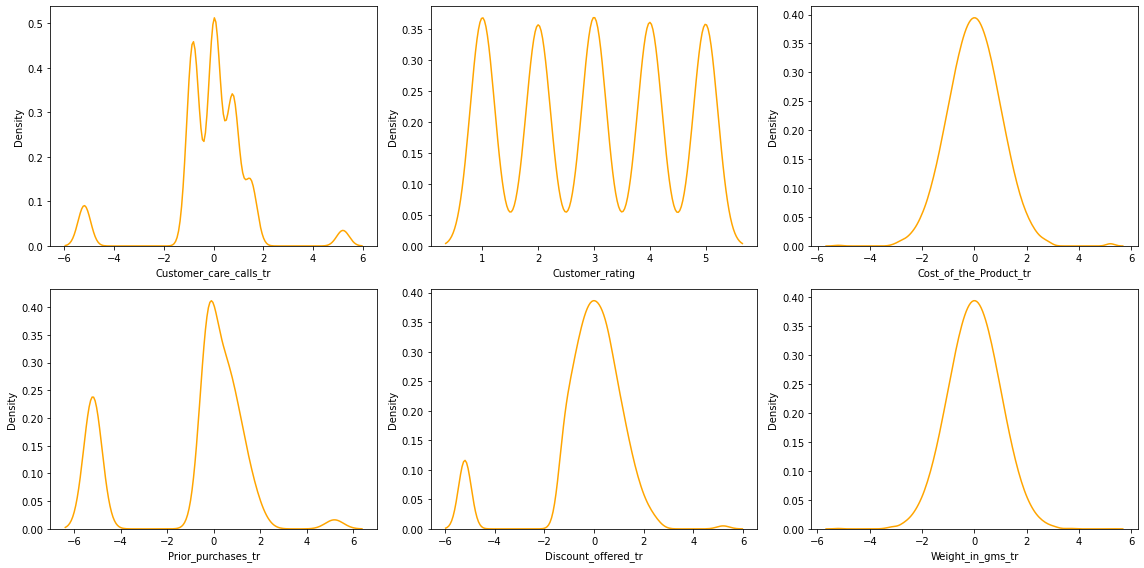

In [ ]:
nums_trans1 = ['Customer_care_calls_tr', 'Customer_rating', 'Cost_of_the_Product_tr', 'Prior_purchases_tr', 'Discount_offered_tr', 'Weight_in_gms_tr']
features1 = nums_trans1
plt.figure(figsize=(16, 8))
for i in range(0, len(features1)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features1[i]], color='orange')
    plt.xlabel(features1[i])
    plt.tight_layout()

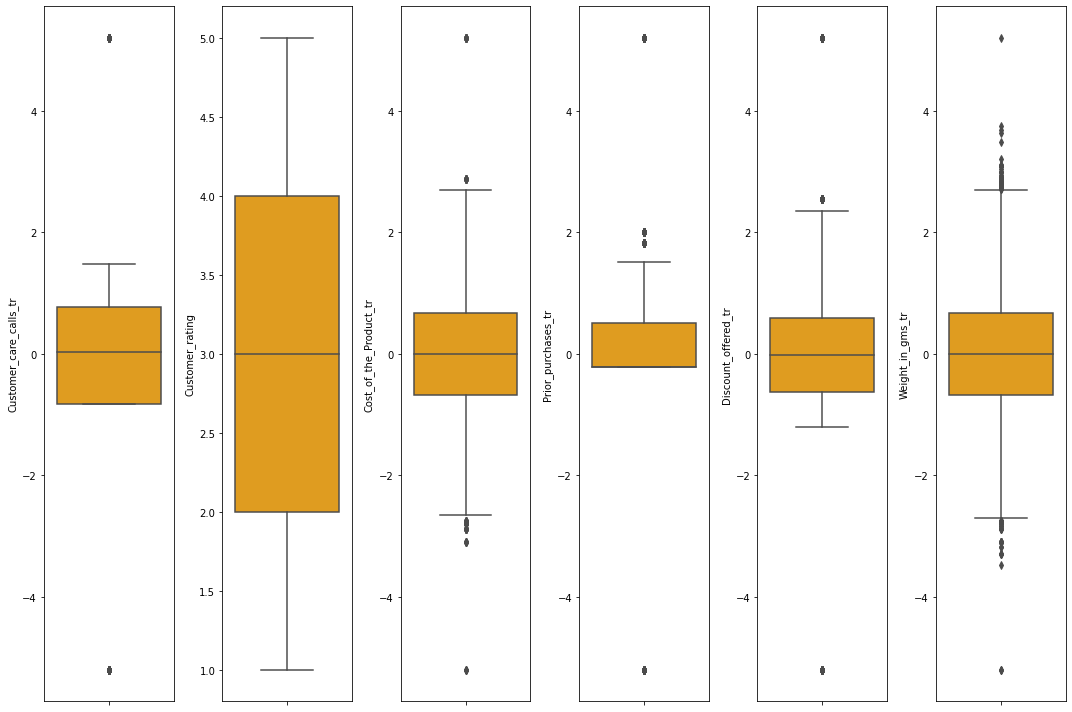

In [ ]:
features1 = nums_trans1
plt.figure(figsize=(15, 10))
for i in range(0, len(features1)):
    plt.subplot(1, len(features1), i+1)
    sns.boxplot(y=df[features1[i]], color='orange', orient='v')
    plt.tight_layout()

- Quantile transformation digunakan pada data `Customer_care_calls_tr`, `Customer_rating`, `Cost_of_the_Product_tr`, `Prior_purchases_tr`, `Discount_offered_tr`, `Weight_in_gms_tr`

### Log Transformation (Opsi 2)

In [ ]:
#Log Transformasi digunakan ke feature yang memiliki skew positif yang besar
df['Discount_offered_log'] = np.log(df['Discount_offered'])
df['Prior_purchases_log'] = np.log(df['Prior_purchases'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['cust_call_std'] = StandardScaler().fit_transform(df['Customer_care_calls'].values.reshape(len(df), 1))
df['cust_rating_std'] = StandardScaler().fit_transform(df['Customer_rating'].values.reshape(len(df), 1))
df['prior_purchase_std'] = StandardScaler().fit_transform(df['Prior_purchases_log'].values.reshape(len(df), 1))
df['product_cost_norm'] = MinMaxScaler().fit_transform(df['Cost_of_the_Product'].values.reshape(len(df), 1))
df['discount_norm'] = MinMaxScaler().fit_transform(df['Discount_offered_log'].values.reshape(len(df), 1))
df['weight_norm'] = MinMaxScaler().fit_transform(df['Weight_in_gms'].values.reshape(len(df), 1))

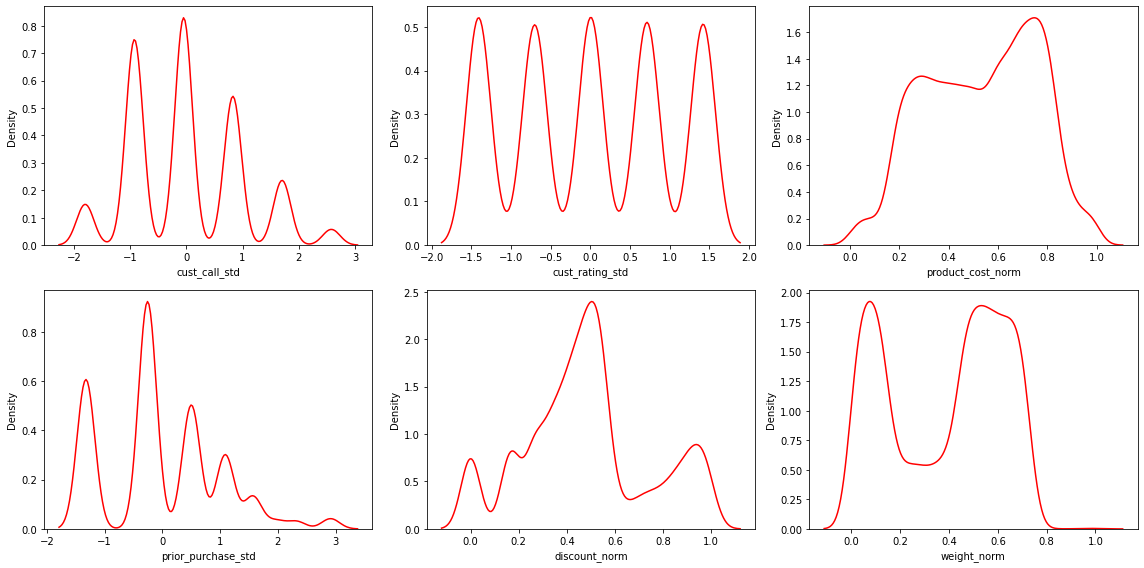

In [ ]:
nums_trans2 = ['cust_call_std', 'cust_rating_std', 'product_cost_norm', 'prior_purchase_std', 'discount_norm', 'weight_norm']
features2 = nums_trans2
plt.figure(figsize=(16, 8))
for i in range(0, len(features2)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features2[i]], color='red')
    plt.xlabel(features2[i])
    plt.tight_layout()

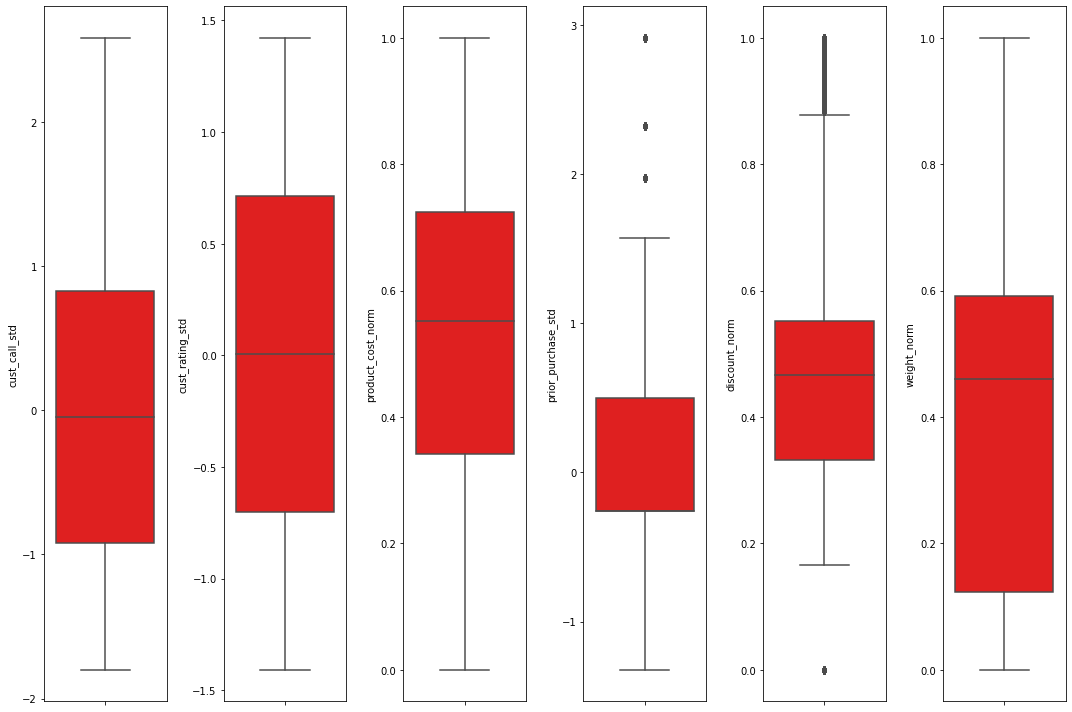

In [ ]:
features2 = nums_trans2
plt.figure(figsize=(15, 10))
for i in range(0, len(features2)):
    plt.subplot(1, len(features2), i+1)
    sns.boxplot(y=df[features2[i]], color='red', orient='v')
    plt.tight_layout()

In [ ]:
df_quantile = df.drop(columns=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Discount_offered_log','Weight_in_gms','Prior_purchases_log','ID','Prior_purchases','Discount_offered','product_cost_norm','discount_norm','cust_call_std','weight_norm','prior_purchase_std','cust_rating_std'])
df_quantile.describe()

,Reached.on.Time_Y.N,Cost_of_the_Product_tr,Discount_offered_tr,Customer_care_calls_tr,Weight_in_gms_tr,Prior_purchases_tr
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.596691,0.002431,-0.240507,-0.116761,-0.000377,-0.876876
std,0.490584,1.016237,1.655656,1.639811,1.003136,2.540321
min,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,0.000000,-0.684763,-0.622621,-0.826698,-0.674431,-0.211070
50%,1.000000,-0.003764,-0.017565,0.031369,0.000000,-0.211070
75%,1.000000,0.678433,0.583496,0.771450,0.674837,0.506348
max,1.000000,5.199338,5.199338,5.199338,5.199338,5.199338


In [ ]:
df_log = df.drop(columns=['Customer_care_calls','Customer_rating','Cost_of_the_Product','Discount_offered_log','Weight_in_gms','Prior_purchases_log','ID','Prior_purchases','Discount_offered','Cost_of_the_Product_tr','Discount_offered_tr','Customer_care_calls_tr','Weight_in_gms_tr','Prior_purchases_tr'])
df_log.describe()

,Reached.on.Time_Y.N,cust_call_std,cust_rating_std,prior_purchase_std,product_cost_norm,discount_norm,weight_norm
count,10999.000000,1.099900e+04,1.099900e+04,1.099900e+04,10999.000000,10999.000000,10999.000000
mean,0.596691,1.128796e-15,4.118293e-17,-4.477089e-15,0.533630,0.478734,0.384663
std,0.490584,1.000045e+00,1.000045e+00,1.000045e+00,0.224595,0.259605,0.238916
min,0.000000,-1.799887e+00,-1.408199e+00,-1.323289e+00,0.000000,0.000000,0.000000
25%,0.000000,-9.237994e-01,-7.007551e-01,-2.555788e-01,0.341121,0.332095,0.122498
50%,1.000000,-4.771132e-02,6.689172e-03,-2.555788e-01,0.551402,0.466155,0.459898
75%,1.000000,8.283768e-01,7.141334e-01,5.019737e-01,0.724299,0.551598,0.591527
max,1.000000,2.580553e+00,1.421578e+00,2.914840e+00,1.000000,1.000000,1.000000


* Log Transformasi digunakan ke feature `Discount_offered` dan `Prior_purchases` karena 2 feature tersebut memiliki skew positif yang besar
* Standarisasi digunakan ke feature `Customer_care_calls`,`Customer_rating` dan `Prior_purchaces_log`
* Normalisasi digunakan ke feature `Cost_of_the_Product`, `Discount_offered_log` dan `Weight_in_gms`

## (D) Handling Outliers

In [ ]:
print(f' jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df)) # coba tambah line ini

Q1 = df['Discount_offered_tr'].quantile(0.25)
Q3 = df['Discount_offered_tr'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['Discount_offered_tr'] >= low_limit) & (df['Discount_offered_tr'] <= high_limit))
df = df[filtered_entries]

print(f' jumlah baris sesudah memfilter outlier: {len(df)}')

 jumlah baris sebelum memfilter outlier: 10999
 jumlah baris sesudah memfilter outlier: 10096


- Kami memutuskan untuk membuat outlier dari kolom `Discount_offered` saja karena memang nilai outliernya cukup banyak. Terdapat 903 baris yang dibuang setelah dilakukan filter IQR.

## (E) Feature Encoding

In [ ]:
# label encoding mapping cats yang punya 2 distinct value / ordinal
# Product_importance dan Gender
mapping_gender = {
    'F' : 0,
    'M' : 1
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2 # dapat dihilangkan karena kalau low = 0, medium = 0 sudah otomatis sama dengan high
}

df['Gender'] = df['Gender'].map(mapping_gender)
df['Product_importance'] = df['Product_importance'].map(mapping_product_importance)

In [ ]:
# Value Counting
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value count kolom Warehouse_block:
F    3379
B    1694
A    1681
D    1672
C    1670
Name: Warehouse_block, dtype: int64
------------------------------ 

Value count kolom Mode_of_Shipment:
Ship      6839
Flight    1648
Road      1609
Name: Mode_of_Shipment, dtype: int64
------------------------------ 

Value count kolom Product_importance:
0    4881
1    4358
2     857
Name: Product_importance, dtype: int64
------------------------------ 

Value count kolom Gender:
0    5092
1    5004
Name: Gender, dtype: int64
------------------------------ 



In [ ]:
print(f'Dimensi data sebelum encoding adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

# One hot encoder warehouse block dan mode of shipment
# WARNING: run code ini sekali saja
for cats in ['Warehouse_block', 'Mode_of_Shipment']:
    # onehots, pakai drop_first=True untuk dimension reduction
    onehots = pd.get_dummies(df[cats], prefix=cats, drop_first=True) 
    # gabung kolom df dan onehots
    df = pd.concat([df, onehots], axis=1) 
    # drop kolom awal
    df.drop(columns=cats, axis=1, inplace=True) 

print(f'Dimensi data setelah encoding adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

Dimensi data sebelum encoding adalah 10096 baris dan 25 kolom
Dimensi data setelah encoding adalah 10096 baris dan 29 kolom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10096 entries, 0 to 10998
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10096 non-null  int64  
 1   Customer_care_calls     10096 non-null  int64  
 2   Customer_rating         10096 non-null  int64  
 3   Cost_of_the_Product     10096 non-null  int64  
 4   Prior_purchases         10096 non-null  int64  
 5   Product_importance      10096 non-null  int64  
 6   Gender                  10096 non-null  int64  
 7   Discount_offered        10096 non-null  int64  
 8   Weight_in_gms           10096 non-null  int64  
 9   Reached.on.Time_Y.N     10096 non-null  int64  
 10  Cost_of_the_Product_tr  10096 non-null  float64
 11  Discount_offered_tr     10096 non-null  float64
 12  Customer_care_calls_tr  10096 non-null  float64
 13  Weight_in_gms_tr        10096 non-null  float64
 14  Prior_purchases_tr      10096 non-null

In [ ]:
df.sample(5)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,...,prior_purchase_std,product_cost_norm,discount_norm,weight_norm,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
9833,9834,4,3,133,2,0,0,10,4195,0,...,-1.323289,0.172897,0.551598,0.466618,0,0,0,1,0,1
2684,2685,3,1,185,4,0,0,35,3648,1,...,0.501974,0.415888,0.851705,0.386706,0,0,0,0,0,1
7816,7817,4,3,181,3,0,1,4,4399,1,...,-0.255579,0.397196,0.332095,0.496421,0,1,0,0,0,0
9338,9339,5,1,151,3,1,1,2,4172,1,...,-0.255579,0.257009,0.166048,0.463258,0,0,0,0,0,1
7570,7571,3,3,157,4,0,0,2,5715,1,...,0.501974,0.285047,0.166048,0.688678,0,1,0,0,0,1


- Dimensi data sebelum encoding adalah 10096 baris dan 25 kolom
- Dimensi data setelah encoding adalah 10096 baris dan 29 kolom
- Memakai drop_first=True agar dimensi dari kolom yang di OHE menjadi k-1, dimana k=jumlah value unik di dalam 1 kolom.

## (F) Handling Class Imbalance

In [ ]:
late = df.groupby(['Reached.on.Time_Y.N']).agg({'ID':'nunique'}).reset_index()
late.columns = ['Late','Total']
late['Percentage'] = late.apply(lambda x: round(x['Total']/10999*100,2),axis=1)
late

Rasio nilai 0 dan 1 pada kolom target adalah 40:60 dan distribusinya tidak sangat timpang, maka dari itu tidak ada class imbalance pada data ini.

# [2] Feature Engineering

## (A) Feature selection (membuang feature yang kurang relevan atau redundan)

In [51]:
#menyeleksi kolom feature ID

df_selection = df.drop(columns = ['ID','Customer_care_calls','Customer_rating'])
df_selection.head()

,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product_tr,Discount_offered_tr,Customer_care_calls_tr,...,prior_purchase_std,product_cost_norm,discount_norm,weight_norm,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,177,3,0,0,44,1233,1,-0.545244,1.292465,0.031369,...,-0.255579,0.378505,0.906526,0.033893,0,0,1,0,0,0
1,216,2,0,1,59,3088,1,0.018820,1.902873,0.031369,...,-1.323289,0.560748,0.976799,0.304894,0,0,0,1,0,0
2,183,4,0,1,48,3374,1,-0.448692,1.421556,-5.199338,...,0.501974,0.406542,0.927370,0.346676,0,0,0,0,0,0
3,176,4,1,1,10,1177,1,-0.562796,0.583496,-0.826698,...,0.501974,0.373832,0.551598,0.025712,1,0,0,0,0,0
4,184,3,1,0,46,2484,1,-0.432104,1.352623,-5.199338,...,-0.255579,0.411215,0.917174,0.216654,0,1,0,0,0,0


Feature yang tidak diseleksi, yakni
1. `ID`
2. `Customer_care_calls`
3. `Customer_rating`

Hal ini disebabkan karena ketiga feature tersebut tidak berkorelasi terkait tepat waktu atau tidaknya pengiriman.

Feature 2 dan 3 dibuang karena dapat menyebabkan data leakage, yang berarti bahwa data dari kedua feature ini sebenarnya belum ada di saat model digunakan untuk memprediksi pengiriman akan terlambat atau tidak.




## (B) Feature extraction (membuat feature baru dari feature yang sudah ada)

In [52]:
#memgekstraksi antara feature Cost dengan Weight (cost per weight)
#mengekstraksi antara feature Cost_Product dengan Diskon yang ditawarkan. jadi terlihat cost sebelum dan sesudah diskon 

df_selection['Cost_Per_Weight'] = (df_selection['Cost_of_the_Product'] / df_selection['Weight_in_gms'])
df_selection['Cost_After_Disc'] = (df_selection['Cost_of_the_Product'] - df_selection['Discount_offered'])

In [53]:
#mengekstrasi Level Weight
def segment(x):
    if x['Weight_in_gms'] < 3634:
        segment = 'Low'
    elif x['Weight_in_gms'] <= 5846:
        segment = 'Mid'
    elif x['Weight_in_gms'] >= 5846:
        segment = 'High'
    return segment

df_selection['Weight_level'] = df_selection.apply(lambda x: segment(x), axis=1)
df_selection.head()

,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product_tr,Discount_offered_tr,Customer_care_calls_tr,...,weight_norm,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Cost_Per_Weight,Cost_After_Disc,Weight_level
0,177,3,0,0,44,1233,1,-0.545244,1.292465,0.031369,...,0.033893,0,0,1,0,0,0,0.143552,133,Low
1,216,2,0,1,59,3088,1,0.018820,1.902873,0.031369,...,0.304894,0,0,0,1,0,0,0.069948,157,Low
2,183,4,0,1,48,3374,1,-0.448692,1.421556,-5.199338,...,0.346676,0,0,0,0,0,0,0.054238,135,Low
3,176,4,1,1,10,1177,1,-0.562796,0.583496,-0.826698,...,0.025712,1,0,0,0,0,0,0.149533,166,Low
4,184,3,1,0,46,2484,1,-0.432104,1.352623,-5.199338,...,0.216654,0,1,0,0,0,0,0.074074,138,Low


In [55]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10096 entries, 0 to 10998
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cost_of_the_Product     10096 non-null  int64  
 1   Prior_purchases         10096 non-null  int64  
 2   Product_importance      10096 non-null  int64  
 3   Gender                  10096 non-null  int64  
 4   Discount_offered        10096 non-null  int64  
 5   Weight_in_gms           10096 non-null  int64  
 6   Reached.on.Time_Y.N     10096 non-null  int64  
 7   Cost_of_the_Product_tr  10096 non-null  float64
 8   Discount_offered_tr     10096 non-null  float64
 9   Customer_care_calls_tr  10096 non-null  float64
 10  Weight_in_gms_tr        10096 non-null  float64
 11  Prior_purchases_tr      10096 non-null  float64
 12  Discount_offered_log    10096 non-null  float64
 13  Prior_purchases_log     10096 non-null  float64
 14  cust_call_std           10096 non-null

- Kami menambah fitur `Cost_Per_Weight` karena memang di dunia shipping ada yang namanya rate harga untuk setiap unit berat. Karena unit berat yang kami pakai adalah gram, maka satuan dari fitur ini adalah $ per gram.
- Kami menambah fitur `Cost_After_Disc` untuk melihat harga produk setelah diberi diskon.
- Kami menambah fitur `Weight_level` untuk membagi nilai kolom `Weight_in_gms` menjadi 3 kategori berat dari Low, Middle, High.

## (C) Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset)
yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

In [ ]:
# 1. Waktu Pengiriman
# 2. Estimasi Waktu Barang Tiba
# 3. Region (Domestic / International)
# 4. Jarak

1. Waktu Pengiriman
- Mengetahui kapan waktu yang sibuk dan longgar di setiap warehouse, sehingga dapat digunakan sebagai alat antisipasi potensi keterlambatan pengiriman.
2. Estimasi Waktu Barang Tiba
- Mengetahui durasi pengiriman barang dari warehouse menuju tempat pengiriman, sehingga dapat membantu model menganalisis tingkat efektifitas dan efisiensi suatu pengiriman.
3. Region (Domestic / International)
- Dokumen dan persyaratan pengiriman internasional memerlukan waktu yang lebih lama, sehingga dapat meningkatkan permodelan yang lebih akurat apabila pengiriman dapat dikategorikan berdasarkan region.
4. Jarak
- Semakin jauh jarak yang ditempuh dalam pengiriman, menyebabkan lamanya waktu pengiriman, dengan adanya fitur jarak diharapkan model dapat memprediksi keterlambatan dari suatu pengiriman.

-SELESAI-